# Brecha Salarial de Género en Argentina
Este proyecto fue realizado por el grupo 15 constituido por Daniela Ferraro y Jorgelina Sigal. Se utilizó un conjunto de datos provenientes del Ministerio de Trabajo, Empleo y Seguridad Social que contiene información sobre las remuneraciones en Argentina, desagregadas por género, tipo de industria y fecha. El objetivo es analizar las brechas salariales de género y su evolución. 

### Dataset
https://www.trabajo.gob.ar/estadisticas/oede/empleoyremuneracion.asp

### Contenido del dataset
#### Periodo: 
Indica año y mes al que corresponde la remuneración.
#### Industria: 
Nombre del sector o rama de actividad económica.
#### Género: 
Género del grupo de trabajadores al que pertenece la remuneración.
#### Mujer: 
Variable binaria (1 o 0) toma el valor 1 si es mujer, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Varon: 
Variable binaria (1 o 0) toma el valor 1 si es varón, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Remuneración: 
Remuneración promedio mensual para ese sector, género y período (en pesos argentinos).
#### Año:
Extracción del año de la columna período.

### Objetivo general
Analizar la evolución de la remuneración media del empleo registrado en el sector privado en Argentina, según rama de actividad y género, en el período comprendido entre enero de 1996 y octubre de 2022, utilizando herramientas de data science, con el fin de identificar patrones, desigualdades y tendencias vinculadas a la brecha salarial de género en el mundo laboral.

### Objetivos específicos
- Procesar y limpiar el conjunto de datos proporcionado mediante herramientas de data science, utilizando bibliotecas como pandas para su análisis exploratorio.

- Describir la evolución temporal de la remuneración media del empleo registrado en el sector privado, diferenciando por género y rama de actividad (según el CIIU rev. 3 a dos dígitos).

- Comparar las trayectorias salariales entre varones y mujeres en los distintos sectores de actividad, identificando las ramas con mayores y menores brechas de género.

- Visualizar los resultados mediante gráficos que faciliten la comprensión de las desigualdades salariales en el período analizado.

- Aplicar un modelo de aprendizaje supervisado de regresión para predecir la remuneración media en función del género, la rama de actividad y el período, evaluando su desempeño y analizando la importancia relativa de cada variable.

- Aplicar modelos de clustering para segmentar perfiles salariales y descubrir agrupamientos naturales sin etiquetas previas.

- Reflexionar sobre las implicancias sociales y económicas de las desigualdades de género en el mundo laboral formal, a partir de los hallazgos del análisis de datos.

### Tecnologías
- Python 3
- Pandas
- Jupyter Notebook
- Visual Studio Code
- Matplotlib 
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

## Análisis y exploración de datos

In [2]:
remuneraciones = pd.read_csv('Remuneraciones.csv', header=0, skiprows=[1])

In [ ]:
#Vista general del dataset
print(remuneraciones.head())

  Periodo                Industria   Genero  Valor
0  feb-96  agricultura y ganaderia  Mujeres  406.8
1  mar-96  agricultura y ganaderia  Mujeres  399.7
2  abr-96  agricultura y ganaderia  Mujeres  375.9
3  may-96  agricultura y ganaderia  Mujeres  395.6
4  jun-96  agricultura y ganaderia  Mujeres  554.0


In [ ]:
#Comprobación de balance entre regisros
print(remuneraciones['Genero'].value_counts())

Genero
Varones    18354
Mujeres    18353
Name: count, dtype: int64


##### Se puede observar que el paso anterior devuelve un registro menos en el género mujeres. A continuación se trabaja para corregir este inconveniente.

In [5]:
print(remuneraciones.shape[0])

36707


In [ ]:
#Cargar sin modificar nada, incluyendo posibles valores vacíos
remuneraciones = pd.read_csv("Remuneraciones.csv", keep_default_na=False)

In [ ]:
#Mostrar cantidad de filas
print("Cantidad total de filas:", remuneraciones.shape[0])

Cantidad total de filas: 36708


In [ ]:
#Se vuelve a comprobar el balance entre registros
print(remuneraciones['Genero'].value_counts())

Genero
Mujeres    18354
Varones    18354
Name: count, dtype: int64


##### Si bien un solo registro no hubiese afectado a grandes rasgos los resultados, es importante mantener una paridad entre géneros durante todo el estudio de la brecha salarial en Argentina.

In [ ]:
#Reemplazo de abreviaturas en español por números
meses = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04',
    'may': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

#Aplicación del reemplazo
remuneraciones['Periodo'] = remuneraciones['Periodo'].str.lower().replace(meses, regex=True)

#Conversión a datetime
remuneraciones['Periodo'] = pd.to_datetime('01-' + remuneraciones['Periodo'], format='%d-%m-%y')

#### Evolución de la remuneración en el tiempo.

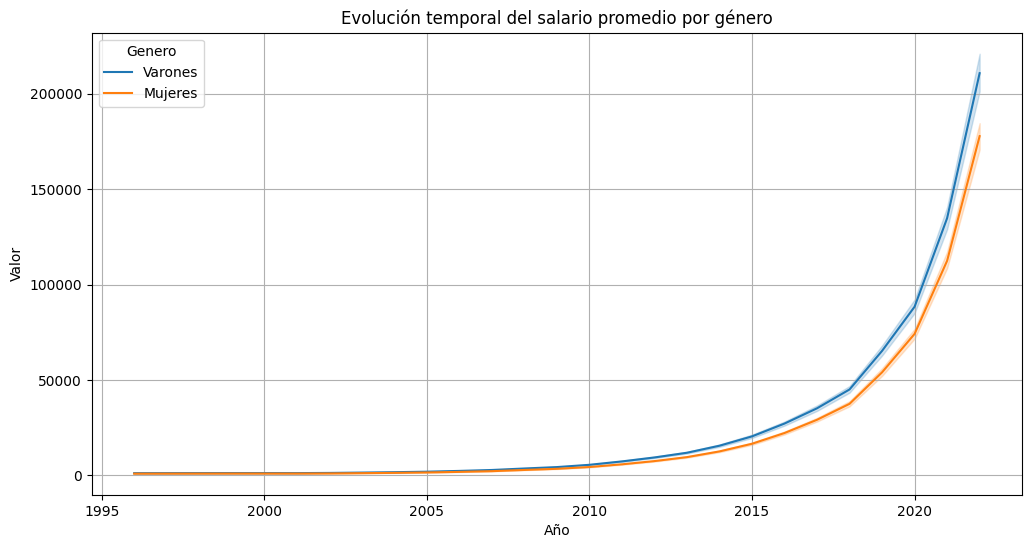

In [10]:
remuneraciones['Periodo'] = pd.to_datetime(remuneraciones['Periodo'], format='%b-%y')
remuneraciones['Año'] = remuneraciones['Periodo'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=remuneraciones, x='Año', y='Valor',hue='Genero',hue_order=['Varones', 'Mujeres'], estimator='mean')
plt.title('Evolución temporal del salario promedio por género')
plt.grid(True)
plt.show()

- Ambas líneas muestran un crecimiento sostenido en las remuneraciones a lo largo del tiempo. Esto es esperable debido a inflación, aumentos salariales y cambios económicos estructurales.
- Aunque ambas curvas crecen, la de los varones se mantiene por encima de la de las mujeres en todo el período y esto evidencia una brecha salarial persistente a lo largo de las décadas donde se acentúa después de 2010.
- La distancia entre las dos curvas aumenta lo que sugiere que la brecha no solo se mantiene, sino que está creciendo en términos absolutos.
##### A pesar del crecimiento general en las remuneraciones del empleo registrado en el sector privado argentino, se observa una brecha salarial estructural y creciente entre varones y mujeres. Este gráfico es una evidencia clara de que, aunque ambos grupos mejoran, el género sigue siendo un factor asociado a una desigualdad en la retribución económica.

#### Distribución de sueldos generales y por género.

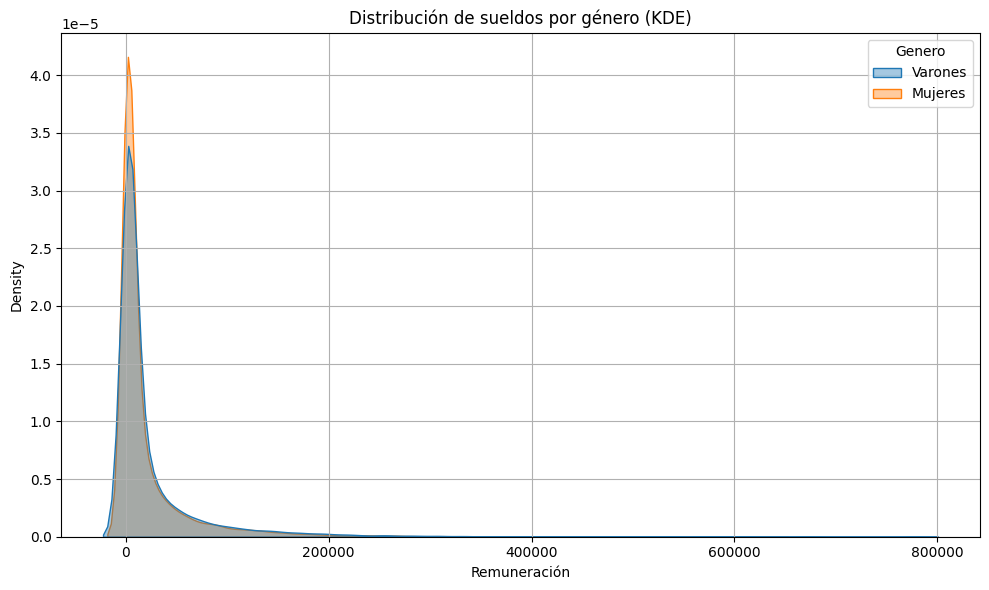

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=remuneraciones, x='Valor', hue='Genero',hue_order=['Varones', 'Mujeres'], fill=True, common_norm=False, alpha=0.4)
plt.title('Distribución de sueldos por género (KDE)')
plt.xlabel('Remuneración')
plt.grid(True)
plt.tight_layout()
plt.show()

- Ambas curvas están fuertemente sesgadas a la derecha, es decir que la mayoría de las personas tienen sueldos bajos o moderados, y pocos casos tiene sueldos muy altos (outliers).
- La curva de las mujeres (naranja) tiene su máximo en valores más bajos que la de los varones. En términos proporcionales, esto sugiere que hay una mayor concentración de mujeres con sueldos más bajos respecto a los varones.
- La curva de los varones (azul) se extiende levemente más hacia la derecha, lo que indica que hay más varones en los rangos más altos de remuneración.
##### Este gráfico confirma que existen asimetrías en la distribución salarial por género: las mujeres tienden a concentrarse más en los tramos salariales bajos, mientras que los varones están algo más distribuidos en el espectro, incluso en los valores más altos. Aunque la diferencia no sea extremadamente marcada en la densidad total, es un indicio estadístico relevante de la brecha y segmentación salarial entre géneros.

#### Sueldos promedio por industria y género.

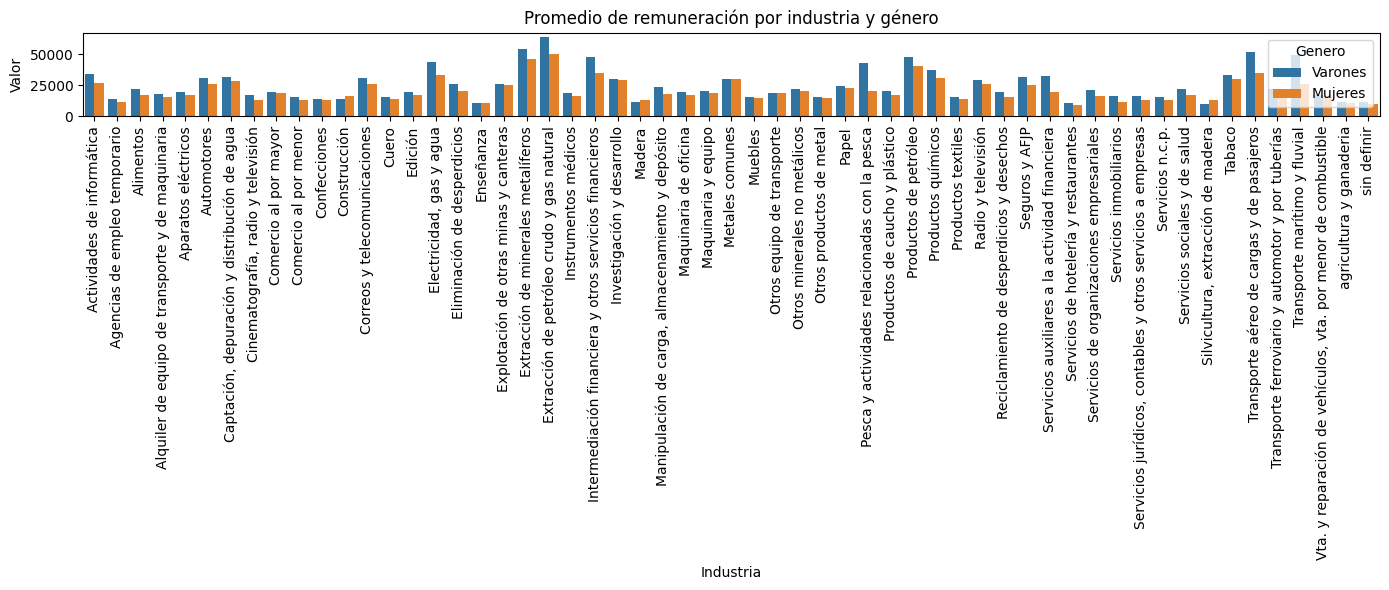

In [12]:
industria_promedio = remuneraciones.groupby(['Industria', 'Genero'])['Valor'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=industria_promedio, x='Industria', y='Valor', hue='Genero',hue_order=['Varones', 'Mujeres'])
plt.xticks(rotation=90)
plt.title('Promedio de remuneración por industria y género')
plt.tight_layout()
plt.show()

- En algunas industrias la brecha es muy notoria:
    - Intermediación financiera y otros servicios financieros
    - Explotación de otras minas y canteras
    - Petróleo crudo y gas natural
    - Servicios empresariales
- Estas diferencias pueden reflejar tanto segmentación vertical (más varones en puestos jerárquicos) como horizontal (roles diferentes dentro de la misma industria).
- En las industrias con mayor promedio salarial tambien se observa brecha de género.
- En las industrias con menor remuneración suele haber mayor participación femenina, lo que contribuye a mantener la brecha a nivel general.
##### Este gráfico permite visualizar de forma clara y contundente la presencia sistemática de la brecha salarial de género en el sector privado argentino, segmentada por rama de actividad. No solo se observa que los varones tienden a tener mayores remuneraciones promedio en casi todas las industrias, sino que las industrias más rentables suelen mostrar también las mayores desigualdades. Esto refuerza la necesidad de políticas públicas y privadas orientadas a reducir la desigualdad estructural de género en el mercado laboral.

## Preprocesamiento

In [ ]:
#Se reemplaza 'Varones' por 0 y 'Mujeres' por 1
remuneraciones['Genero'] = remuneraciones['Genero'].map({'Varones': 0, 'Mujeres': 1})
le = LabelEncoder()
remuneraciones['Industria'] = le.fit_transform(remuneraciones['Industria'])

### Heatmap de correlación

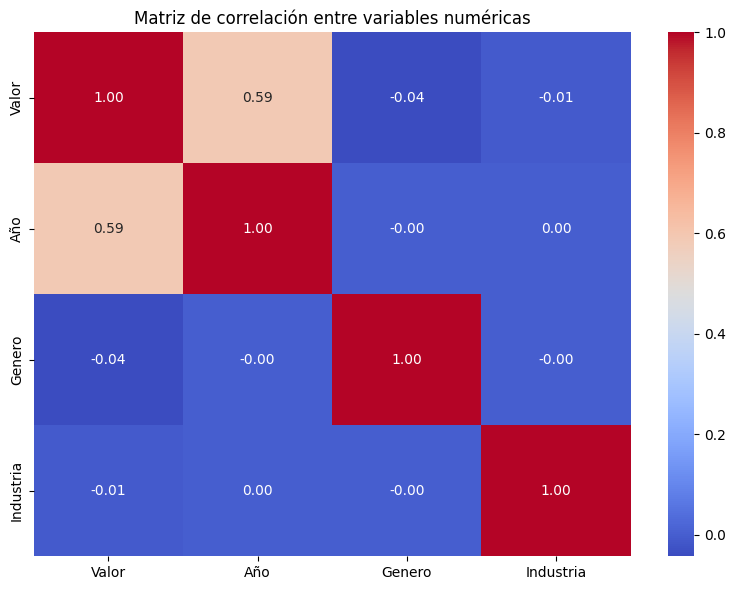

In [ ]:
#Se seleccionan las columnas numéricas del dataset
variables_numericas = remuneraciones[['Valor', 'Año', 'Genero', 'Industria']]
#Se calcula la matriz de correlación
matriz_corr = variables_numericas.corr()
#Se crea el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

A partir del gráfico se destacan los siguientes puntos:

- Valor y Año presentan una correlación moderada (≈ 0.59). Esto indica que las remuneraciones tienden a aumentar con el paso del tiempo, lo cual resulta coherente con procesos inflacionarios o actualizaciones salariales por antigüedad.

- Las variables Género e Industria no muestran correlaciones significativas con Valor, lo que sugiere que podrían aportar información distinta al modelo de clustering.

- Las demás correlaciones son prácticamente nulas (cercanas a 0), lo cual descarta la multicolinealidad entre las variables seleccionadas. Esto valida su inclusión conjunta en el modelo sin necesidad de eliminar ninguna por redundancia.

#### Outliers usando el IQR

In [19]:
Q1 = remuneraciones['Valor'].quantile(0.25)
Q3 = remuneraciones['Valor'].quantile(0.75)
IQR = Q3 - Q1

outliers = remuneraciones[(remuneraciones['Valor'] < Q1 - 1.5 * IQR) | (remuneraciones['Valor'] > Q3 + 1.5 * IQR)]
print(f"Cantidad de outliers detectados: {len(outliers)}")

Cantidad de outliers detectados: 5035


- Identificación de extremos salariales
    - Hay 5035 valores atípicos en los sueldos registrados. Esto es importante porque los outliers (por ejemplo, sueldos extremadamente altos o bajos) pueden distorsionar los resultados, especialmente si se hace clustering o normalización.
- Complemento con la matriz de correlación
    - Si se detecta una correlación fuerte (como entre Año y Valor, r=0.59), y muchos outliers, se plantean las siguientes preguntas:
        - ¿Los outliers están relacionados con ciertos años?
        - ¿El aumento salarial en los últimos años está generando esos extremos?

In [ ]:
#Se eligen las variables 
features = ['Valor', 'Año', 'Genero', 'Industria']

In [ ]:
#Se escalan los datos
X= remuneraciones[features]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

### Justificación de selección de variables
La selección de variables para construir el modelo de clustering incluyó las siguientes: Valor, Año, Género e Industria. A continuación se detalla la razón de su elección:

    Valor (remuneración): Es la variable principal del análisis, ya que el objetivo del proyecto es identificar patrones y agrupamientos en los salarios. Representa la magnitud económica de interés y su inclusión es fundamental.

    Año: Incorporar esta variable permite capturar la evolución temporal de las remuneraciones. Como se observó en la matriz de correlación, existe una relación moderada con Valor, lo que apota información valiosa sin redundancia excesiva.

    Género: Incluir esta variable codificada permite analiazr posibles brechas o segsos de género dentro de los grupos formados por el algoritmo. Aunque su correlación con Valor es baja, es una dimensión relevante desde una perspectiva de equidad y análisis social.
    
    Industria: Representa el sector de actividad económica, lo que puede explicar diferencias estructurales en los salarios. Su inclusión busca capturar variabilidad asociada al contexto laboral.

Dado que ninguna de las variables presenta una alta colinealidad con otra, se optó por mantener las cuatro en el modelo, asegurando diversidad de información sin comprometer la estabilidad del análisis.

Durante la etapa de de preprocesamiento, se realizó una detección de outliers sobre la variable Valor (remuneración) utilizando el método del rango intercuartílico (IQR). Este método permitió identificar 5.035 observaciones atípicas, que superaban los límites establecidos por 1.5 veces el IQR.

Dado que el objetivo del proyecto es analizar la estructura salarial real, se decidió no eliminar los outliers por las siguientes razones:

    Los valores atípicos en remuneración representan situaciones reales, como altos cargos jerárquicos, sectores de alta especialización o salarios que reflejan desigualdades estructurales. Eliminarlos podría distorsionar la representación de la realidad.

    El conjunto de datos tiene un tamaño considerable, por lo que el impacto de los outliers se puede mitigar sin comprometer la validez del análisis.

En lugar de eliminarlos, se optó por aplicar RobustScaler para la estandarización de las variables. Este método es más adecuado que StandardScaler en presencia de valores extremos, ya que:

    Escala los datos usando la mediana y el rango intercuartílico, en lugar de la media y la desviación estándar.

    Reduce la influencia de los outliers, mejorando el desempeño de los algoritmos de clustering como K-means, que son sensibles a la escala y a valores extremos.

Esta decisión permitió preservar la diversidad de los datos y lograr una segmentación más representativa, al mismo tiempo que se controló el efecto distorsionante de los valores atípicos.

## Modelo de clustering

##### Luego del análisis exploratorio y el preprocesamiento, se avanza hacia la construcción de un modelo de aprendizaje no supervisado con el objetivo de identificar patrones ocultos en las remuneraciones del empleo registrado privado en Argentina, sin necesidad de conocer previamente las etiquetas o categorías.

##### Se optó por utilizar el algoritmo K-Means, debido a:
- Su eficiencia para conjuntos medianamente grandes.
- Su capacidad para trabajar con variables numéricas como el valor de la remuneración.
- Su interpretación sencilla: los datos se agrupan en torno a centroides representando los puntos medios de cada cluster. 

### Evaluación del número óptimo de clusters

Para determinar la cantidad ideal de clusters (`k`), se utilizaron dos enfoques complementarios:

- Método del Codo
    - Este método observa la inercia (suma de las distancias dentro de los clústeres) y busca un punto donde la disminución deje de ser significativa. 

- Coeficiente de Silhouette
    - Este índice mide la coherencia de los clústeres, evaluando qué tan similares son los elementos dentro de un mismo grupo en comparación con otros grupos. 

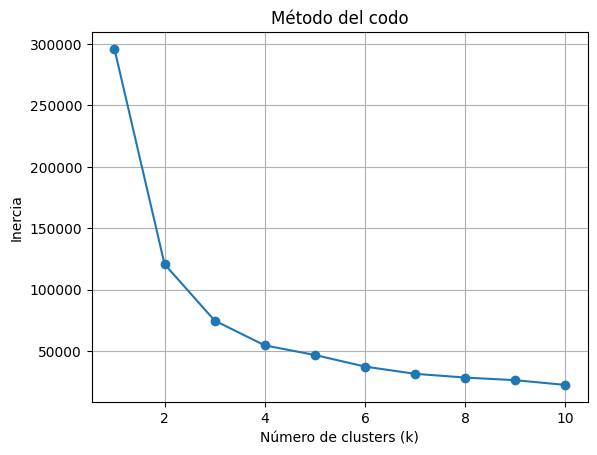

In [22]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

*El gráfico muestra un codo claro en `k = 3`, lo cual sugiere que a partir de ese valor, agregar más clústeres aporta poca mejora en compacidad.*

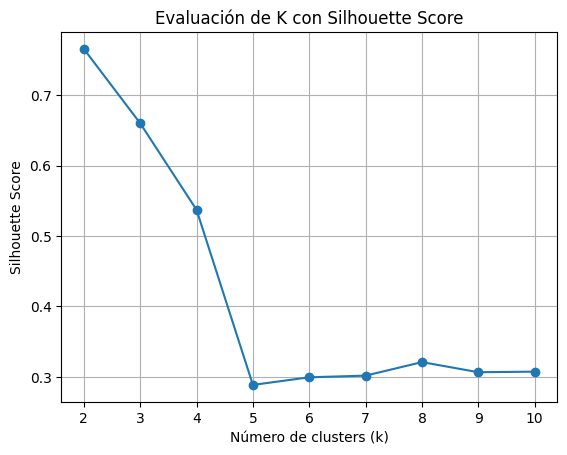

In [ ]:
#Visualización de Silhouette score
scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
plt.plot(k_values, scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluación de K con Silhouette Score')
plt.grid(True)
plt.show()

*El valor óptimo se alcanza en `k = 2`, con un puntaje cercano a 0.75, lo que indica una buena separación entre grupos.*

### Gráfico de silhouette y PCA

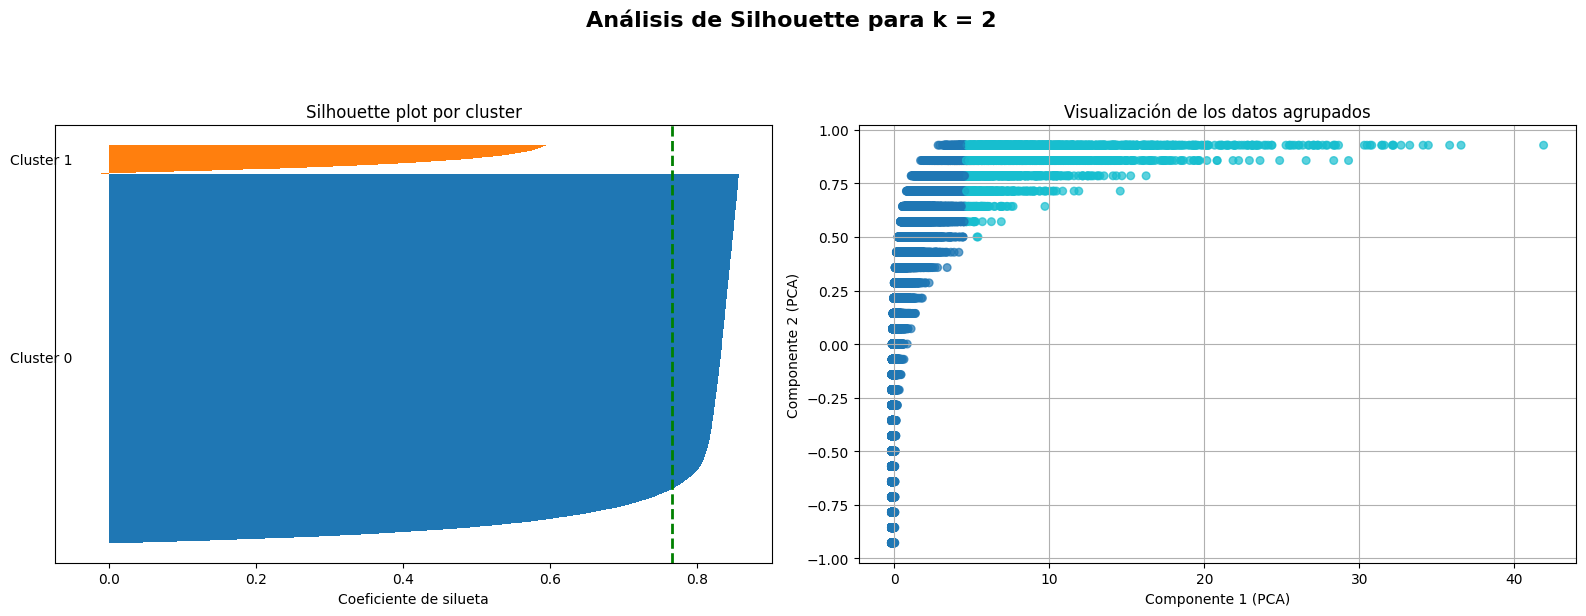

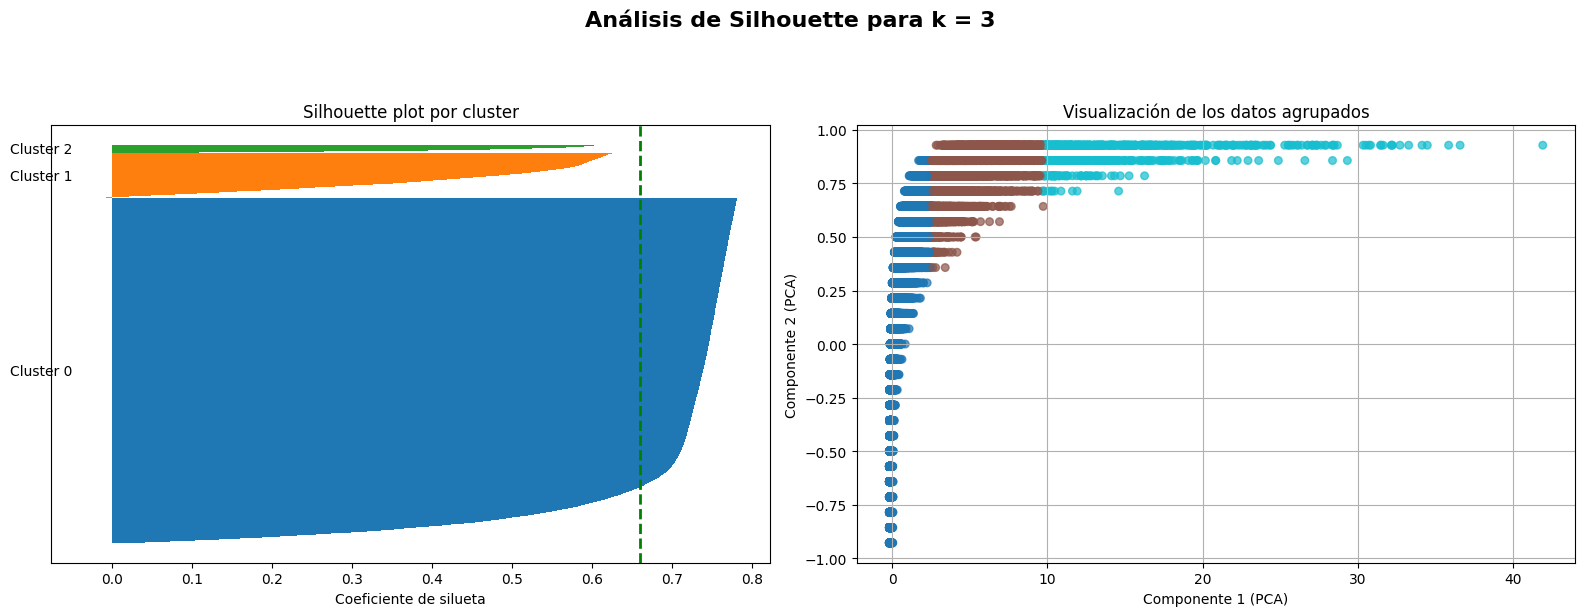

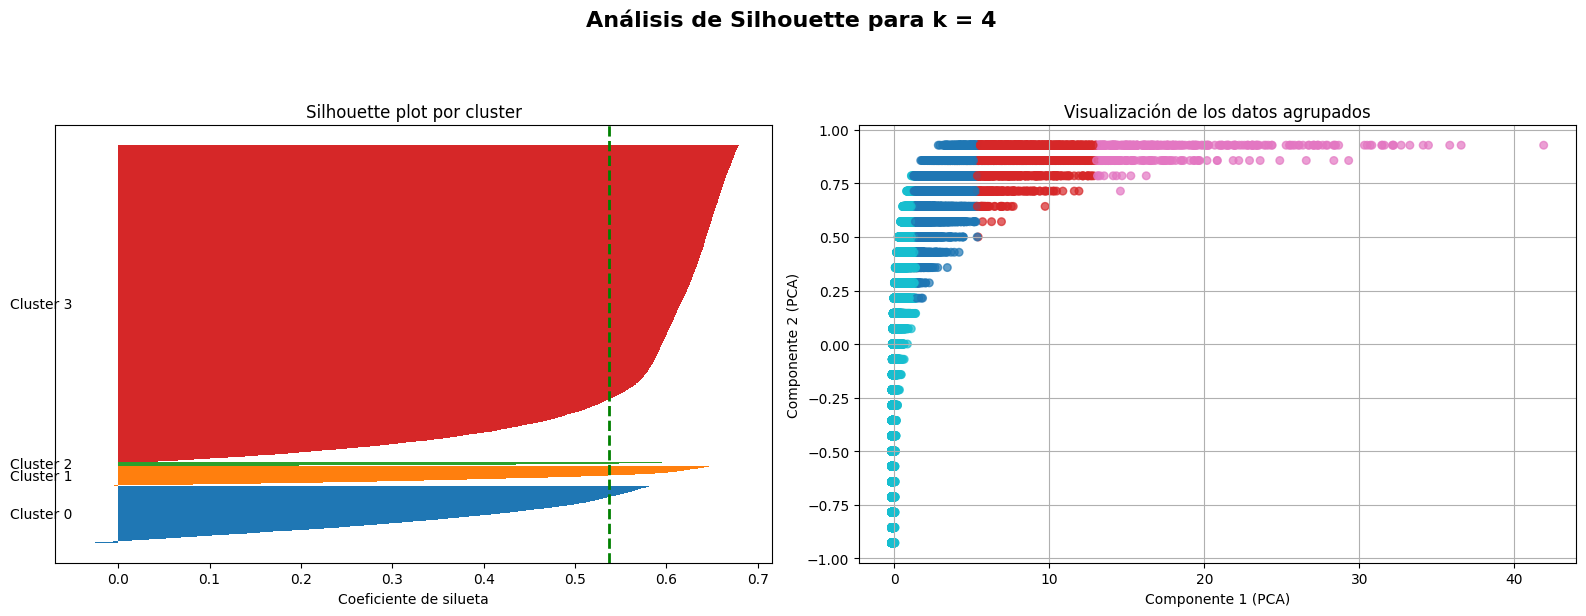

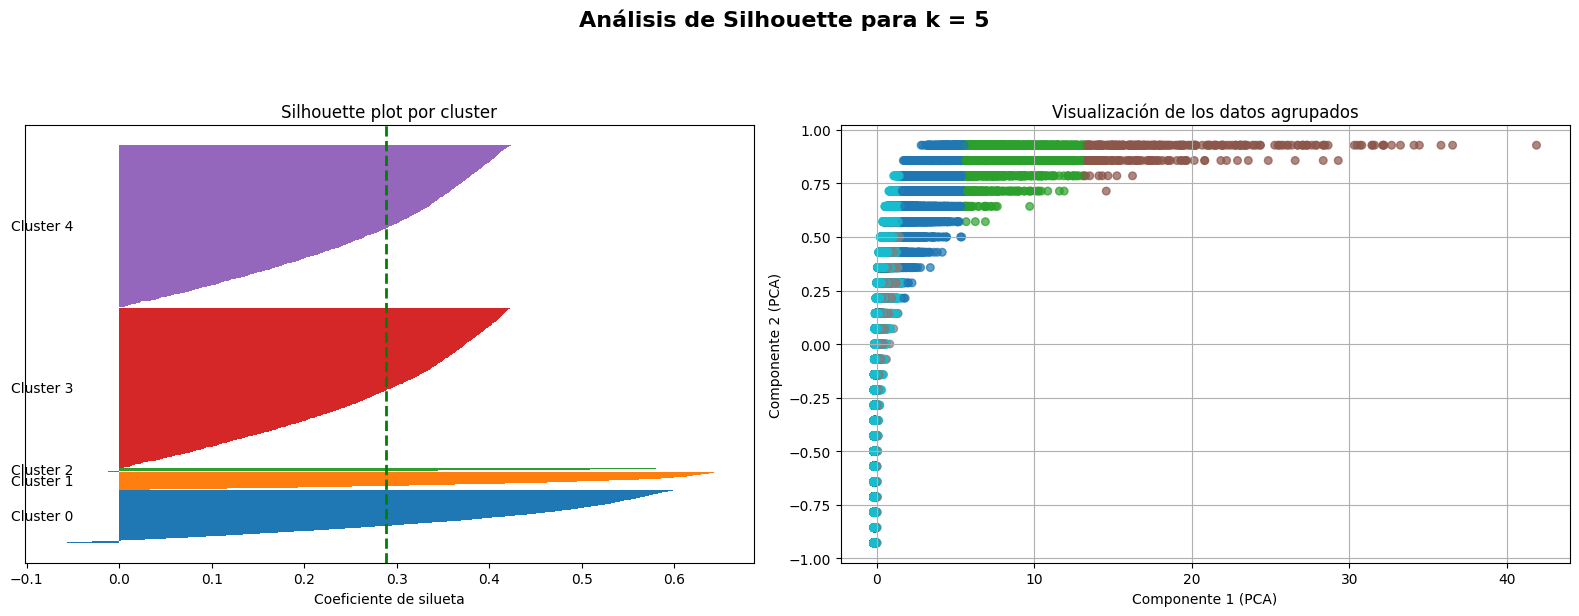

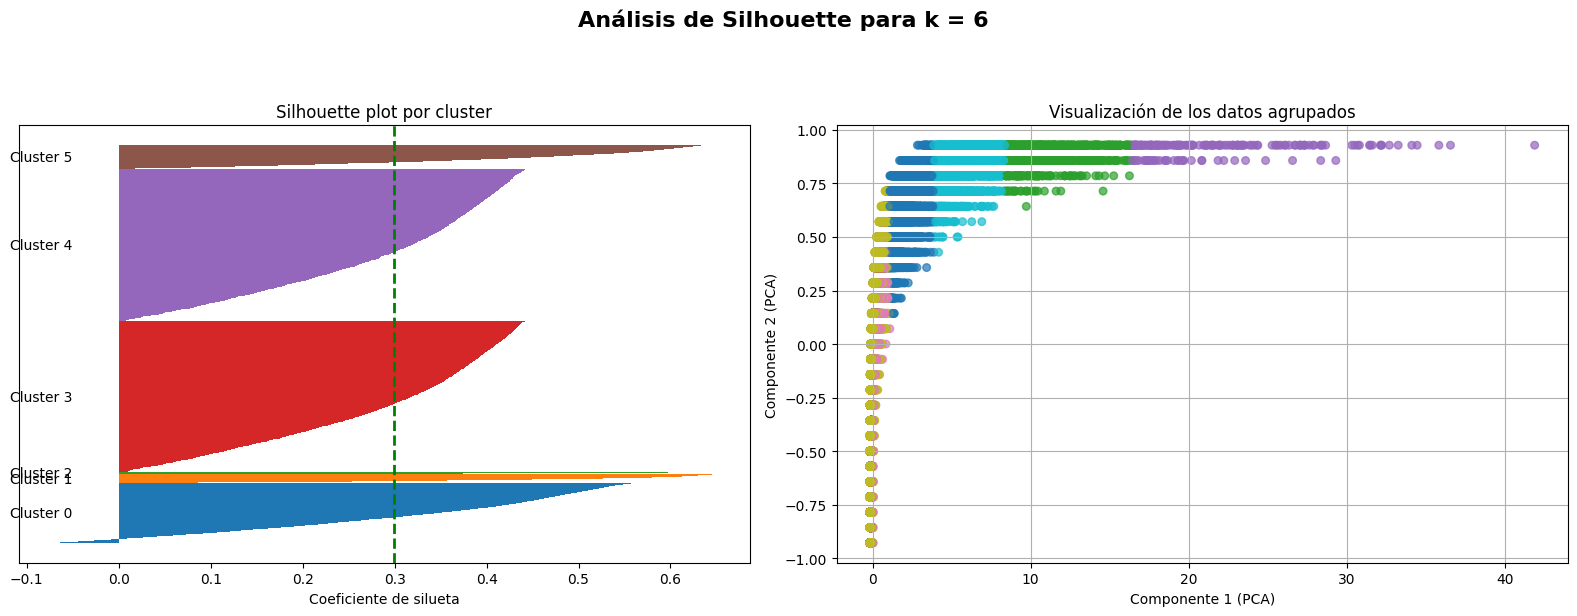

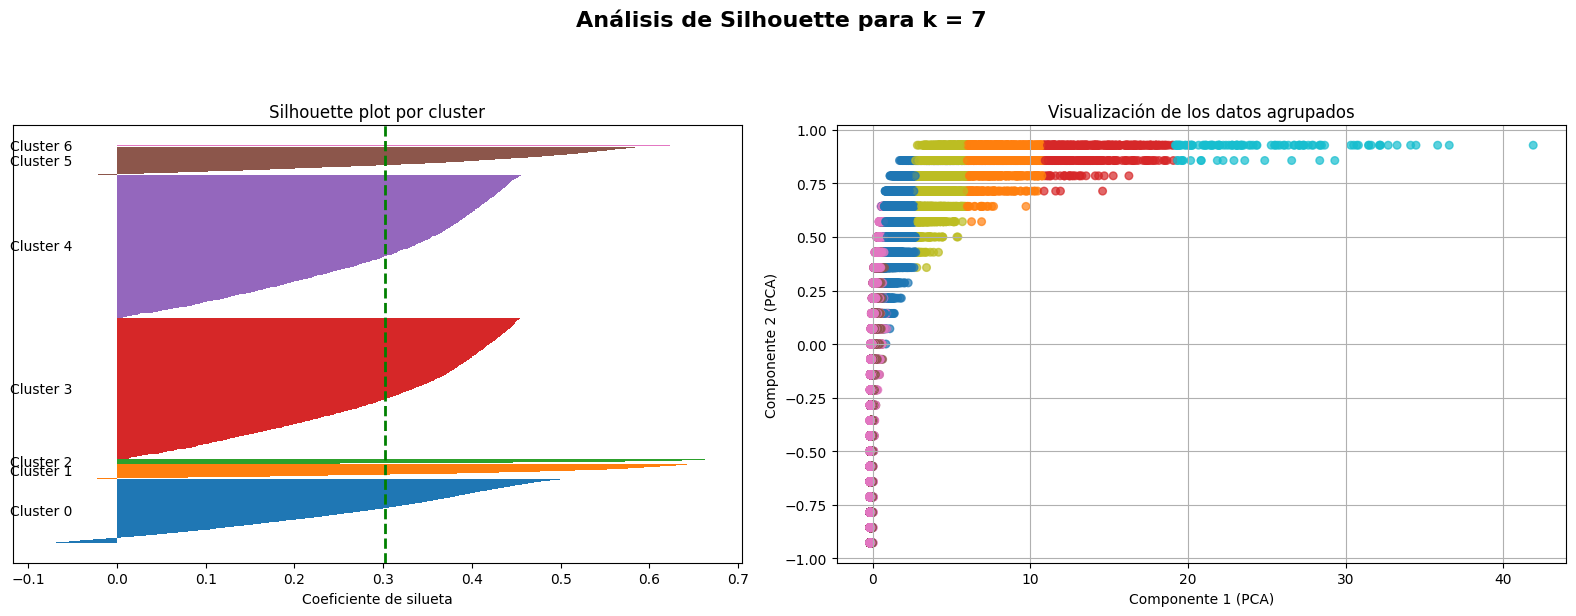

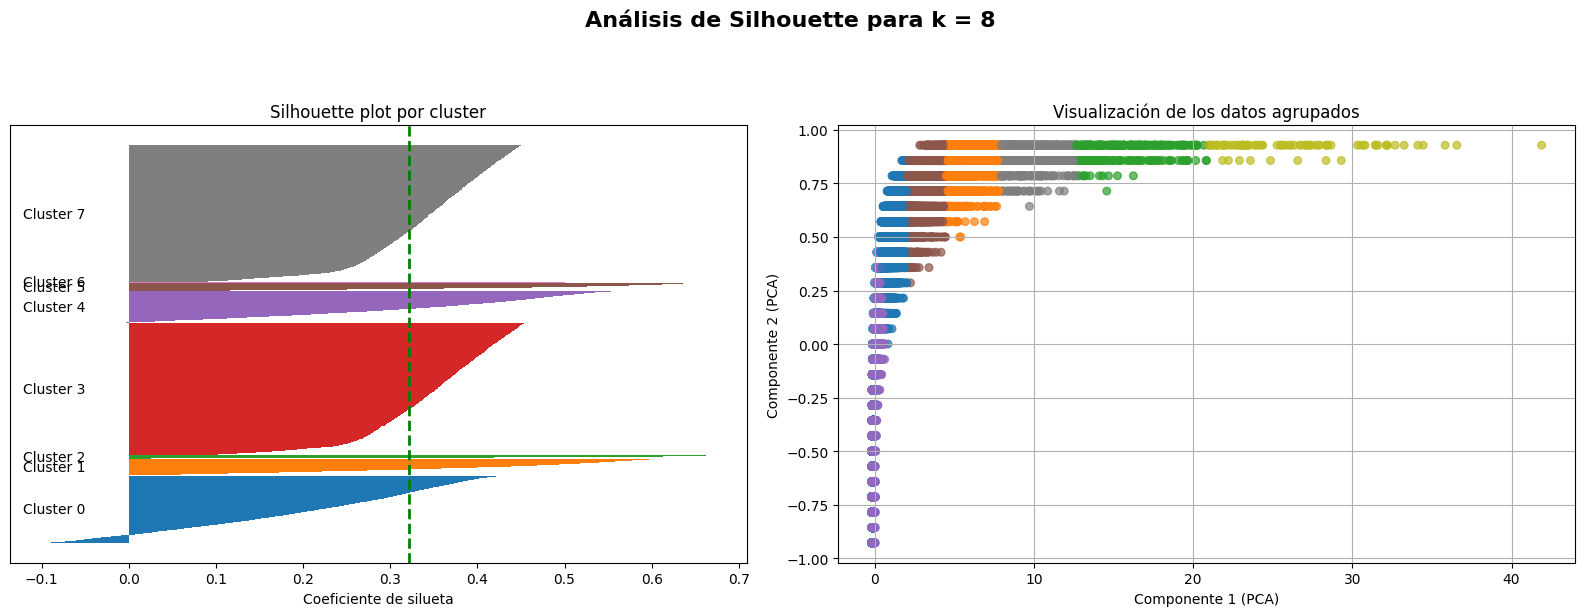

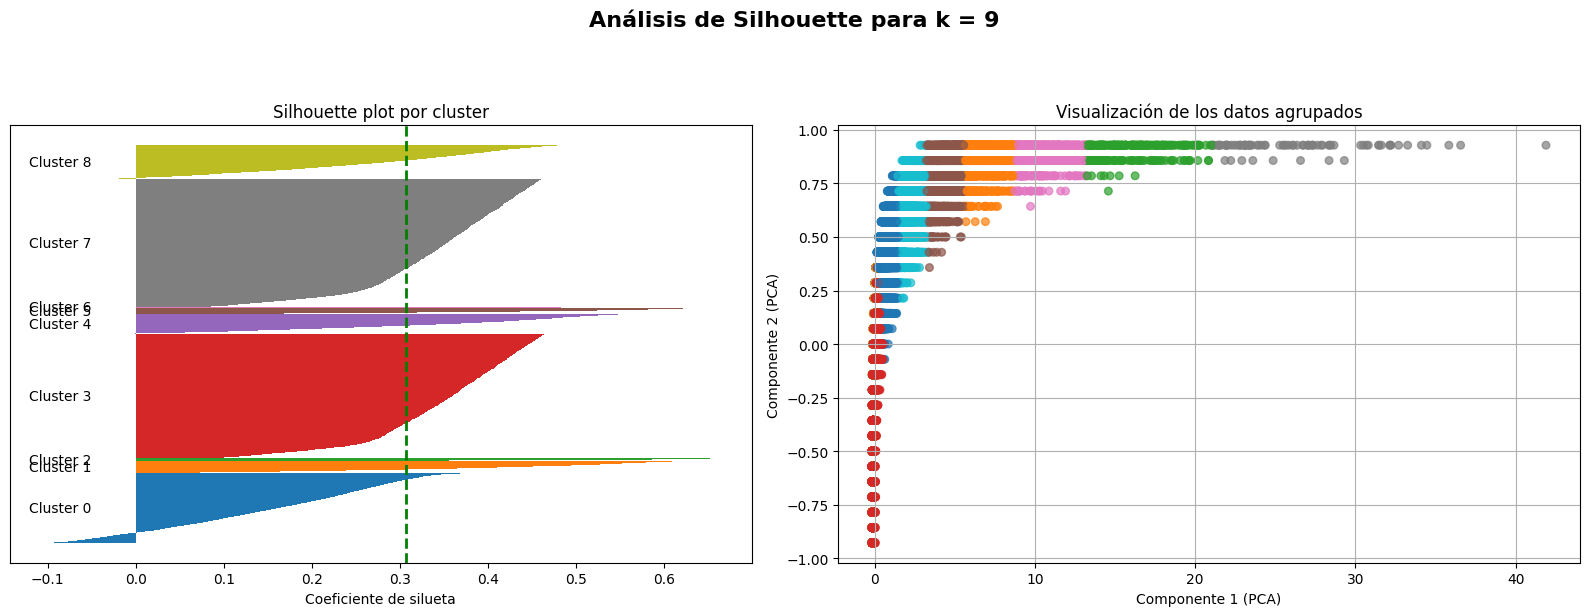

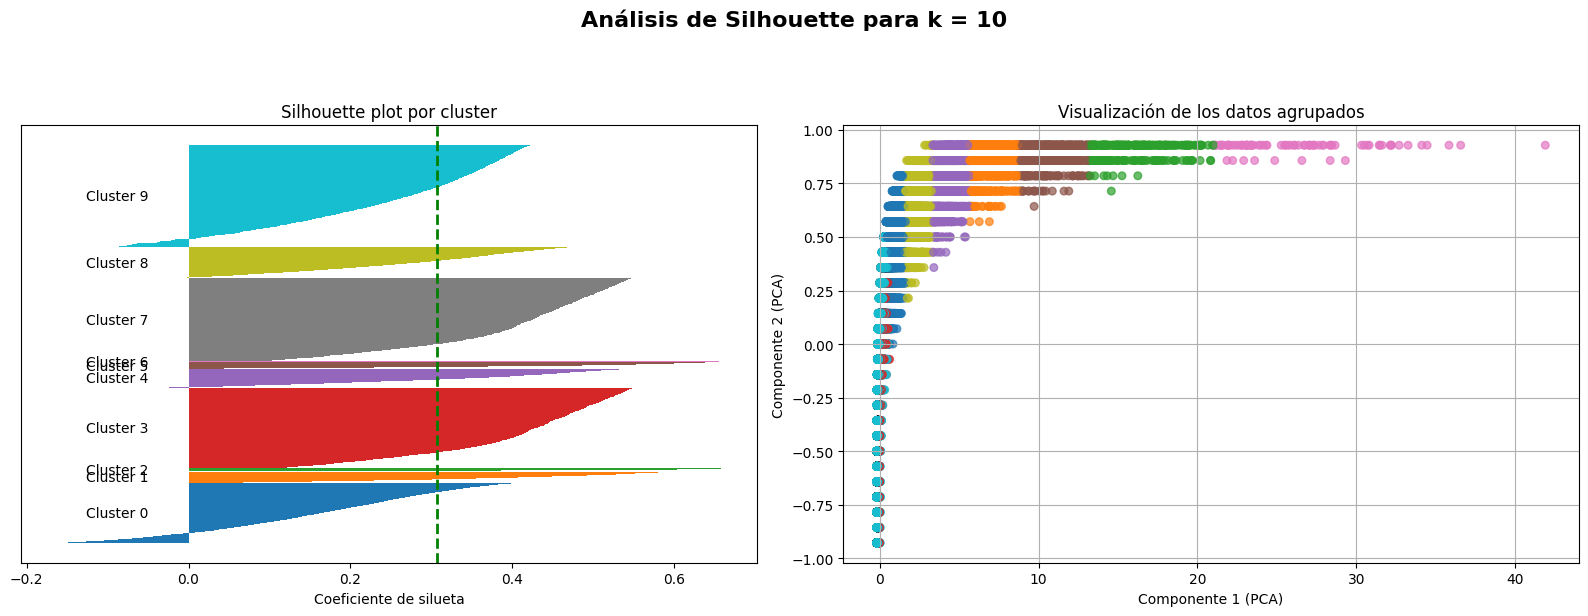

In [ ]:
for k in k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    kmS = KMeans(n_clusters=k, random_state=42)
    labels = kmS.fit_predict(X_scaled)
    centroids = kmS.cluster_centers_

    silhouette_vals = silhouette_samples(X_scaled, labels)
    avg_score = np.mean(silhouette_vals)

    #Panel 1 gráfico de silueta
    y_lower = 10  #Se deja espacio desde abajo
    for cluster in range(k):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        size_cluster = len(cluster_silhouette_vals)
        y_upper = y_lower + size_cluster

        color = plt.cm.tab10(cluster % 10)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals,
                 height=1.0, edgecolor='none', color=color)
        
        #Se muestra el número del cluster centrado en su barra
        ax1.text(-0.05, y_lower + 0.5 * size_cluster, f'Cluster {cluster}',
                 va='center', ha='right', fontsize=10)
        y_lower = y_upper + 10  #Se deja espacio entre clusters

    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_xlabel('Coeficiente de silueta')
    ax1.set_title('Silhouette plot por cluster')
    ax1.set_yticks([])

    #Panel 2 visualización de clusters
    scatter = ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)
    ax2.set_xlabel('Componente 1 (PCA)' if 'PCA' in locals() else 'Feature 1')
    ax2.set_ylabel('Componente 2 (PCA)' if 'PCA' in locals() else 'Feature 2')
    ax2.set_title('Visualización de los datos agrupados')
    ax2.grid(True)

    plt.suptitle(f'Análisis de Silhouette para k = {k}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### Observaciones
- k=2
    - Buena separación. 
    - Clusters bien definidos. 
    - Buen balance entre cohesión e independencia.
- k=3
    - Aceptable. 
    - El tercer cluster es pequeño y menos compacto.
- k=4
    - Se empieza a degradar la calidad de los clusters, aunque sigue siendo útil.
- k=5
    - Disminuye notablemente la cohesión. 
    - Algunos clusters tienen silhouette < 0.2.
- k entre 6 y 10
    - Clusters pequeños, algunos con silhouette negativo (mala asignación). 
    - Separación deficiente. 
    - Redundancia de clusters.



### Decisión
Aunque el método del codo sugiere `k = 3`, el coeficiente de silhouette sugiere que `k = 2` genera agrupamientos más definidos y separados, y tiene el mayor coeficiente promedio (~0.72). Por eso, se decidió continuar el análisis con **k = 2** como número óptimo de clusters.

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42)
remuneraciones['Cluster'] = kmeans.fit_predict(X_scaled)

##### Este gráfico de barras de género por cluster permite observar cómo se distribuye la variable género en cada grupo.

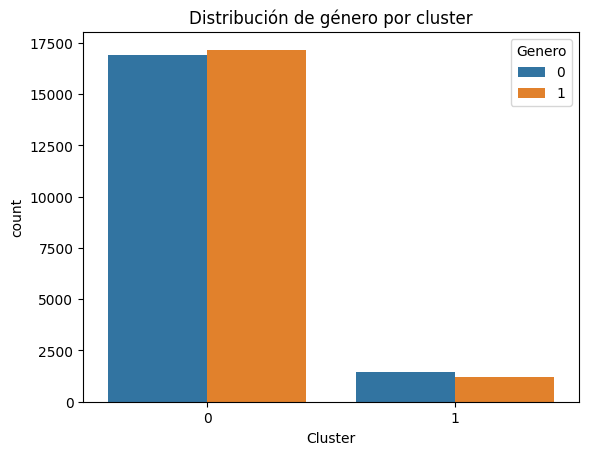

In [36]:
sns.countplot(data=remuneraciones, x='Cluster', hue='Genero')
plt.title('Distribución de género por cluster')
plt.show()

- Ambos clusters tienen una distribución bastante equilibrada entre géneros. 

*A pesar de que el género fue considerado como una de las variables en el análisis, se observa que no parece haber una separación marcada por género entre los clusters formados, lo cual sugiere que otros factores (como el valor de la remuneración o el año) tienen mayor peso en la segmentación.*

##### Este boxplot de remuneraciones por cluster evidencia las diferencias en las medianas y la dispersión de los valores.

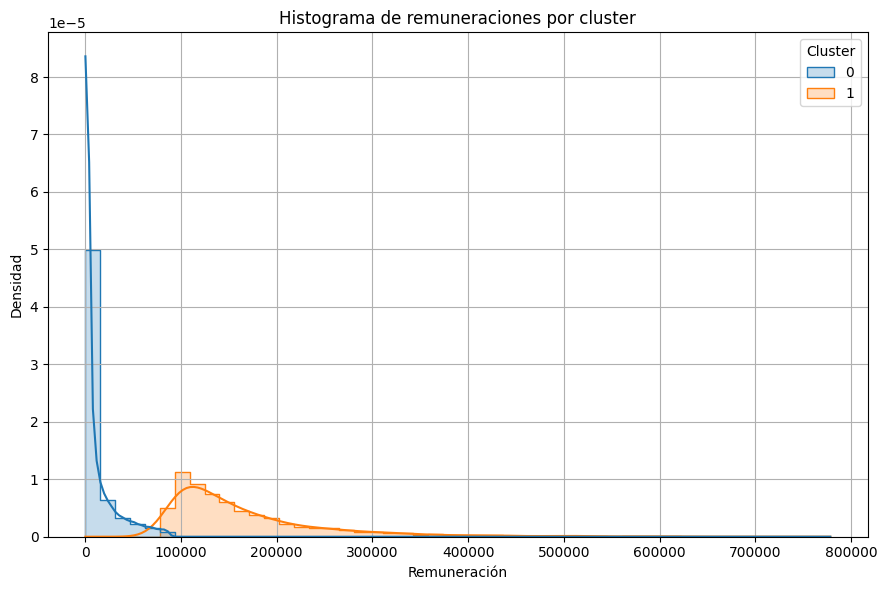

In [37]:
plt.figure(figsize=(9, 6))
sns.histplot(data=remuneraciones, x='Valor', hue='Cluster', bins=50, kde=True, element='step', stat='density', common_norm=False)
plt.title('Histograma de remuneraciones por cluster')
plt.xlabel('Remuneración')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

- Cluster 0: Alta densidad de casos con remuneraciones menores a 50.000. Se asocia a los sueldos más bajos del dataset.

- Cluster 1: Tiene una distribución más dispersa con un pico cerca de los 120.000 y una cola larga que llega a valores altos (mayores a 700.000), probablemente sueldos altos, cargos jerárquicos u otras condiciones (incluidos outliers).

*El análisis revela dos grupos bien diferenciados: uno compuesto por individuos con remuneraciones bajas y otro con niveles significativamente más altos. Esto sugiere que el monto salarial es el principal eje de segmentación en el modelo de clustering.*

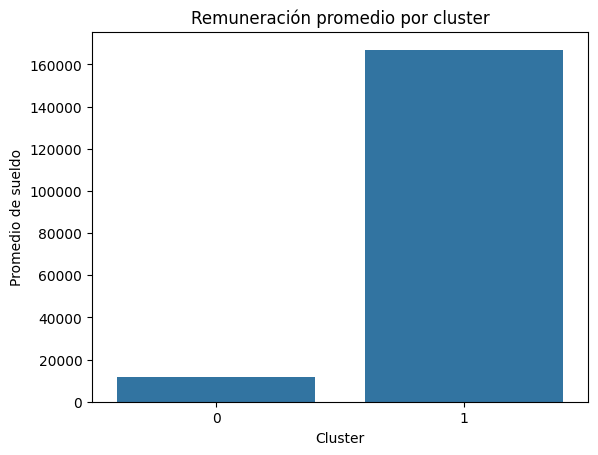

In [38]:
promedios = remuneraciones.groupby('Cluster')['Valor'].mean().reset_index()
sns.barplot(data=promedios, x='Cluster', y='Valor')
plt.title('Remuneración promedio por cluster')
plt.ylabel('Promedio de sueldo')
plt.xlabel('Cluster')
plt.show()


- Cluster 0
    - Tiene una remuneración promedio considerablemente baja, cercana a los $10,000.
    - Es un cluster masivo, como se vió antes en la distribución de género.
    - Agrupa a la mayoría de trabajadores con empleos de menor calificación o en industrias con salarios bajos.
    - Representa al grupo más económicamente vulnerable.
- Cluster 1
    - Presenta una remuneración promedio muy elevada, cercana a los $170,000.
    - A pesar de ser un cluster más pequeño, contiene salarios muy por encima del promedio nacional.
    - Agrupa cargos jerárquicos, profesionales altamente calificados, puestos de poder económico en sectores privilegiados.

In [39]:
remuneraciones.groupby(['Cluster', 'Genero'])['Valor'].median().unstack()

Genero,0,1
Cluster,,
0,3195.85,2670.4
1,143676.15,134547.1


- Cluster 0 (remuneraciones bajas)
    - Mediana hombres: $3,195
    - Mediana mujeres: $2,670

*Brecha a favor de los varones de casi $500 en el segmento más vulnerable.*
- Cluster 1 (remuneraciones altas)
    - Mediana hombres: $143,676
    - Mediana mujeres: $134,547
    
*Brecha a favor de los varones de más de $9,000 en este segmento.*

Por el momento se concluye que:

- Ambos clusters presentan una brecha de género, siempre a favor del género codificado como 0 (probablemente varón).

- La brecha aumenta con el nivel salarial: lo cual sugiere que las desigualdades se amplifican a medida que sube el rango de remuneración.

- El análisis por cluster ayuda a visibilizar inequidades ocultas que se perderían si solo se observan promedios globales.

## Visualización y análisis

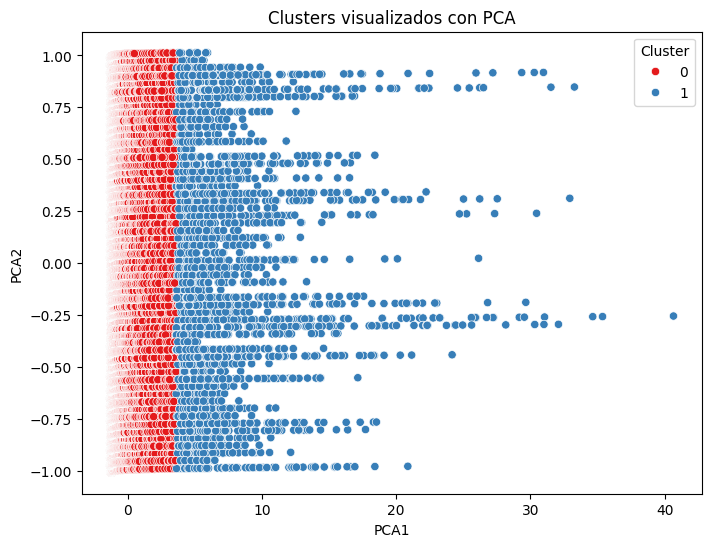

In [40]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

remuneraciones['PCA1'] = pca_result[:, 0]
remuneraciones['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=remuneraciones, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Clusters visualizados con PCA')
plt.show()

- Separación clara entre clusters

    - Se observa una división nítida entre los dos clusters: el rojo (Cluster 0) y el azul (Cluster 1), sin mucha superposición entre ellos.

    - Esto indica que K-means con k=2 logró una partición efectiva: los grupos son internamente similares y externamente distintos, lo que fue respaldado también por el Silhouette Score (0.72 ≈ excelente).

- Dirección de la variabilidad

    - PCA1 (eje horizontal) concentra la mayor parte de la varianza. Representa la remuneración (Valor), porque es la variable con mayor dispersión.

    - PCA2 aporta menor varianza pero ayuda a afinar la separación.

- Interpretación contextual

    - Cluster 0 (rojo): personas con menores remuneraciones, industrias con salarios bajos o de rangos laborales iniciales.

    - Cluster 1 (azul): personas con altas remuneraciones, más dispersas y con outliers, cargos altos, mayor antigüedad o industrias más rentables.

**INSIGHTS**

- La segmentación es coherente y significativa: los dos grupos no sólo se distinguen por el sueldo (como se ve en los otros gráficos), sino que también en el espacio PCA ocupan regiones separadas. 
- Refuerza que el clustering no está asignando etiquetas de manera aleatoria o caótica: hay estructura real en los datos. 
- La poca superposición sugiere que la separación es robusta y el uso de K-means fue apropiado con k=2.



## Conclusiones
Luego de aplicar técnicas de aprendizaje no supervisado, específicamente el algoritmo K-means con k=2 clusters, y de evaluar cuidadosamente la estructura latente de los datos mediante PCA y Silhouette Score, podemos concluir que el modelo logra una segmentación sólida y significativa.

La visualización en el espacio reducido por PCA evidenció una separación clara entre los grupos identificados. Esta separación no sólo fue visual, sino también estadísticamente respaldada por un coeficiente de silueta promedio cercano a 0.72, lo cual indica una excelente cohesión intra-cluster y separación inter-cluster.

A nivel interpretativo, los clusters reflejan realidades laborales diferenciadas:

Un grupo compuesto por personas con remuneraciones más bajas, posiblemente empleadas en sectores menos rentables o en etapas iniciales de carrera; y otro grupo caracterizado por salarios más elevados y dispersos, asociados con cargos jerárquicos, antigüedad, o industrias con mayor rentabilidad.

Este análisis permite obtener valor estratégico a partir de los datos, al identificar patrones ocultos en la estructura salarial. Además, proporciona evidencia empírica para comprender la distribución de la remuneración y su relación con el género, el año y el sector de actividad.

## Reflexión final
El proyecto no sólo cumplió con los objetivos metodológicos —análisis exploratorio, preprocesamiento, selección de variables, escalamiento, clustering y validación— sino que también generó conocimiento útil y aplicable. La decisión de mantener los outliers pero aplicar RobustScaler permitió conservar la riqueza del dataset sin distorsionar los resultados, lo que fortaleció el modelo.

Finalmente, esta segmentación es un punto de partida clave para estudios posteriores sobre desigualdad salarial, políticas públicas y estrategias empresariales orientadas a la equidad.